In [99]:
import scanpy as sc
import numpy as np
import pandas as pd
from anndata import AnnData
from scipy.io import mmread, mmwrite

In [2]:
p0_mat = mmread("../paper_inter_data/p0_empty_drops_filtered_counts.mtx")

In [25]:
p0_annot = pd.read_csv("../paper_inter_data/p0_empty_drops_filtered_annotation.csv",index_col=2)

In [26]:
genes_df = pd.read_csv("/projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/dorsal_horn/P0/Solo.out/genes.tsv",sep="\t", header=None)

In [27]:
gene_exp_vec = genes_df.loc[:,1].values

In [28]:
p0_mat.shape

(54894, 3628)

In [29]:
p0_annot.shape

(3628, 5)

In [33]:
p0_singlets = p0_annot["hybrid_score"].values < 1.0
p0_singlet_exp = p0_mat.tocsc().transpose()[p0_singlets,:]
p0_annot_singlet = p0_annot.loc[p0_singlets,:]

In [37]:
p0_ann = AnnData(p0_singlet_exp,obs=annot_singlet)
p0_ann.var_names = gene_exp_vec

In [38]:
p0_ann.var_names_make_unique()

In [39]:
#crude preprocessing
#log normalize by CPM
sc.pp.normalize_per_cell(p0_ann, counts_per_cell_after=1e6)
sc.pp.log1p(p0_ann)
#calculate distance using top 50 pcas
sc.pp.neighbors(p0_ann)
#create the UMAP and initial preclustering
sc.tl.umap(p0_ann)
sc.tl.leiden(p0_ann, resolution=0.1)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [40]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

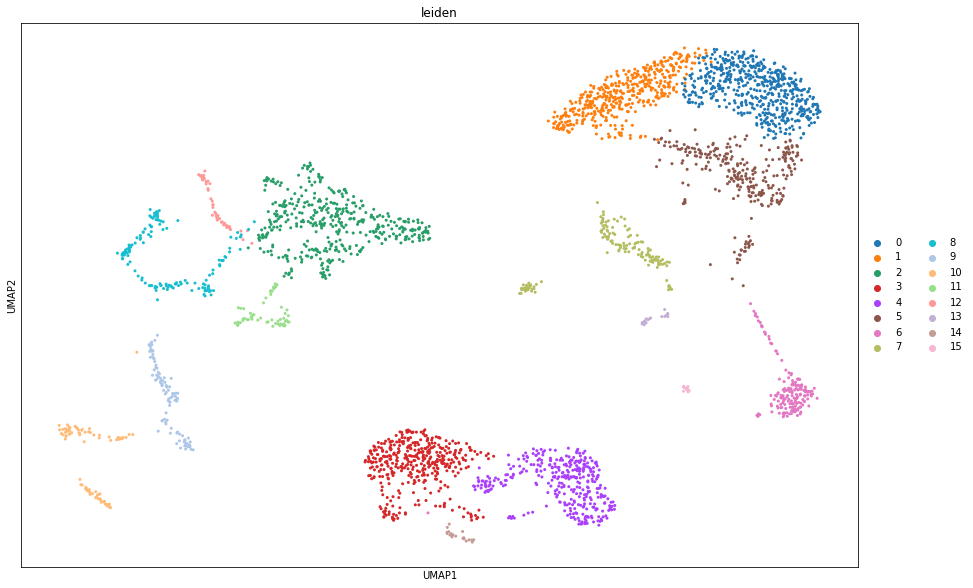

In [49]:
sc.pl.umap(p0_ann,color="leiden")

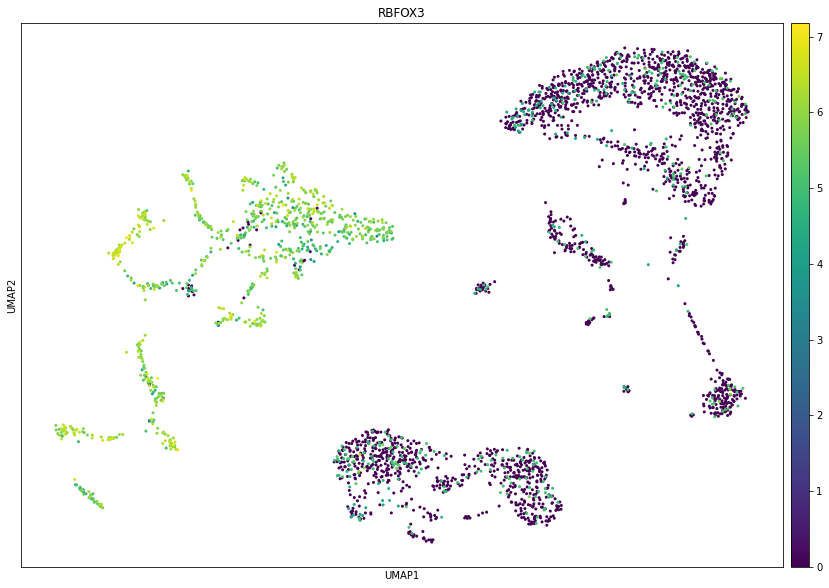

In [74]:
#neurons
sc.pl.umap(p0_ann,color="RBFOX3",save="_p0_preclustering_neurons.pdf")

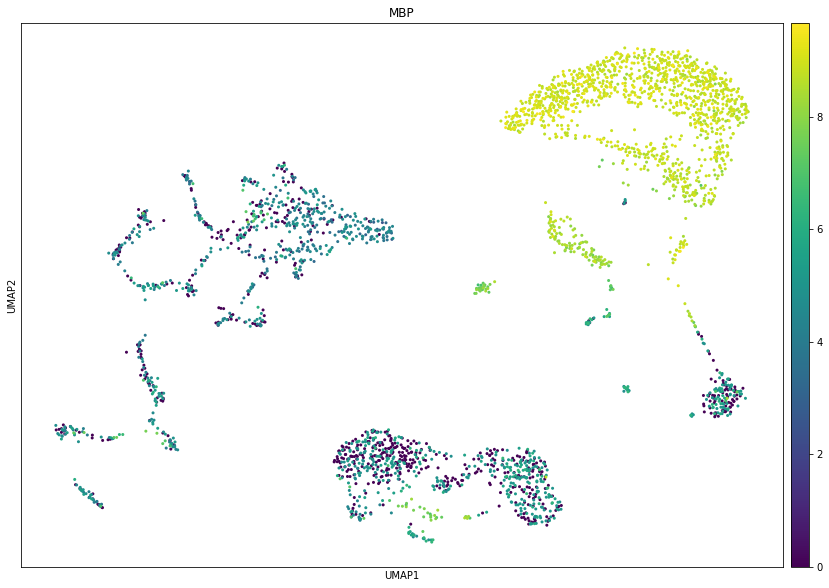

In [75]:
#Oligodendrocytes
sc.pl.umap(p0_ann,color="MBP",save="_p0_preclustering_oligodendrocytes.pdf")

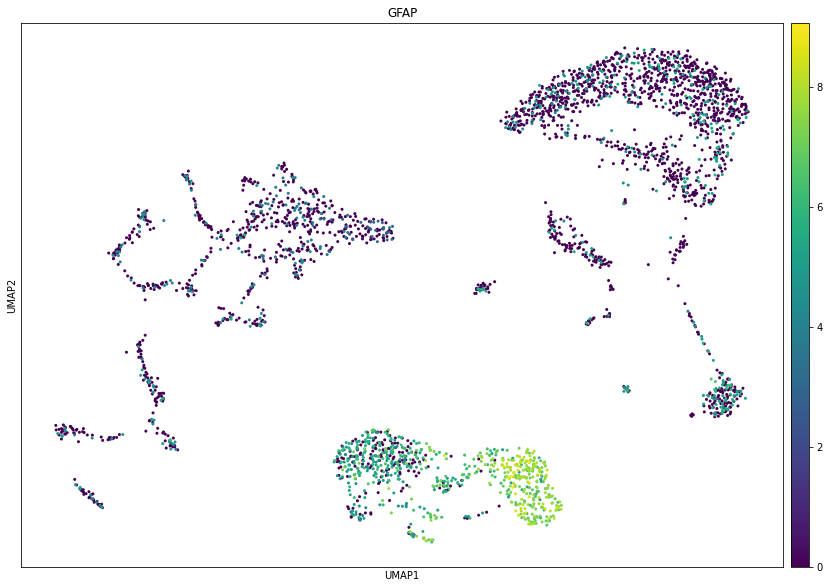

In [76]:
#Astrocytes
sc.pl.umap(p0_ann,color="GFAP",save="_p0_preclustering_astrocytes.pdf")

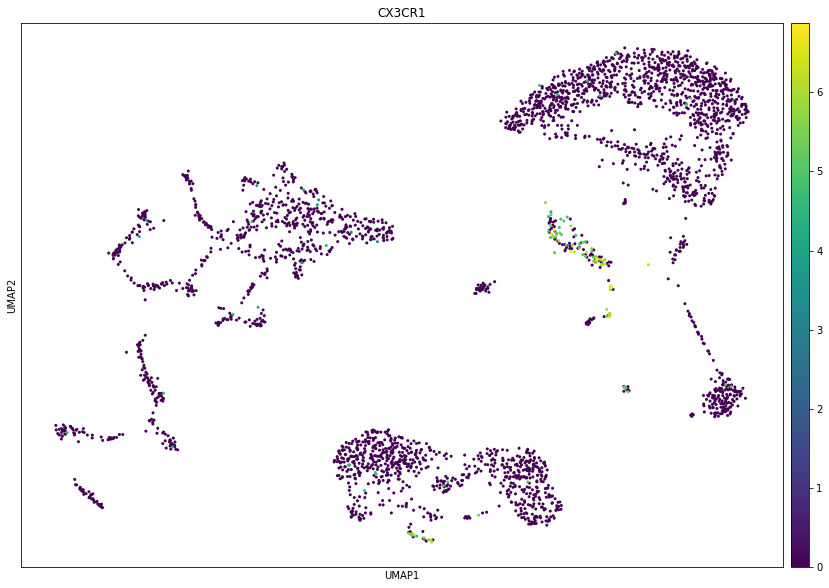

In [77]:
#Microglia
sc.pl.umap(p0_ann,color="CX3CR1",save="_p0_preclustering_microglia.pdf")

In [50]:
P2_mat = mmread("../paper_inter_data/P2_empty_drops_filtered_counts.mtx")
P2_annot = pd.read_csv("../paper_inter_data/P2_empty_drops_filtered_annotation.csv",index_col=2)
genes_df = pd.read_csv("/projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/dorsal_horn/P2/Solo.out/genes.tsv",sep="\t", header=None)


In [51]:
P2_singlets = P2_annot["hybrid_score"].values < 1.0
P2_singlet_exp = P2_mat.tocsc().transpose()[P2_singlets,:]
P2_annot_singlet = P2_annot.loc[P2_singlets,:]
P2_ann = AnnData(P2_singlet_exp,obs=annot_singlet)
P2_ann.var_names = gene_exp_vec

In [52]:

P2_ann.var_names_make_unique()

In [53]:
#crude preprocessing
#log normalize by CPM
sc.pp.normalize_per_cell(P2_ann, counts_per_cell_after=1e6)
sc.pp.log1p(P2_ann)
#calculate distance using top 50 pcas
sc.pp.neighbors(P2_ann)
#create the UMAP and initial preclustering
sc.tl.umap(P2_ann)
sc.tl.leiden(P2_ann, resolution=0.3)

         Falling back to preprocessing with `sc.pp.pca` and default params.


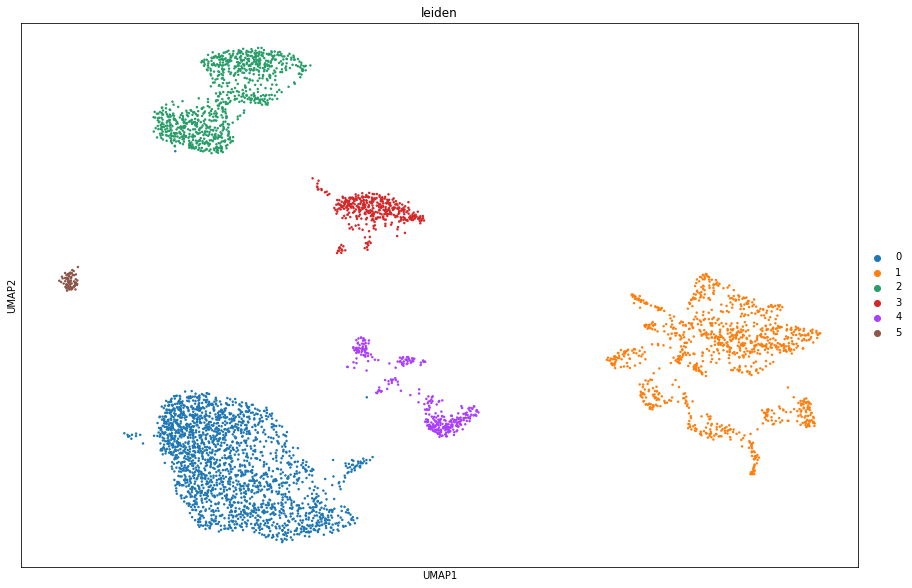

In [89]:
sc.tl.leiden(P2_ann, resolution=0.1)

sc.pl.umap(P2_ann,color="leiden")

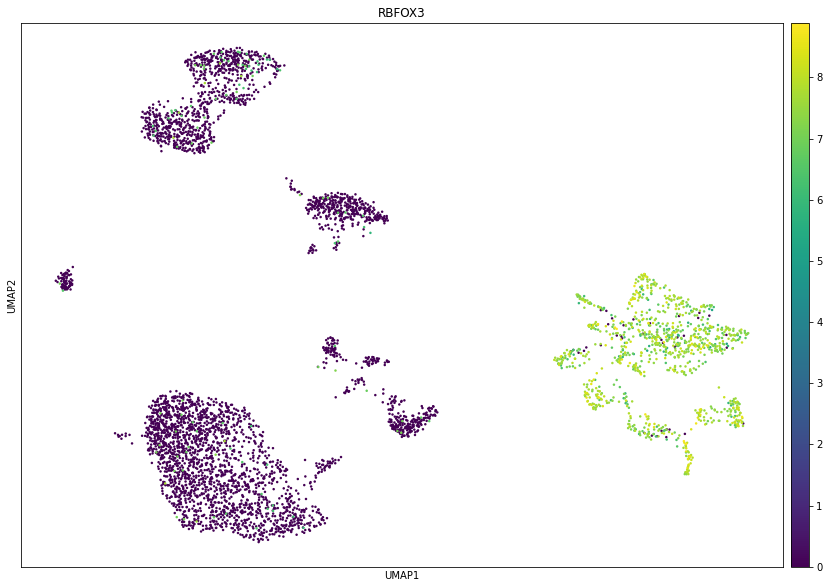

In [78]:
#neurons
sc.pl.umap(P2_ann,color="RBFOX3",save="_p2_preclustering_neuron.pdf")

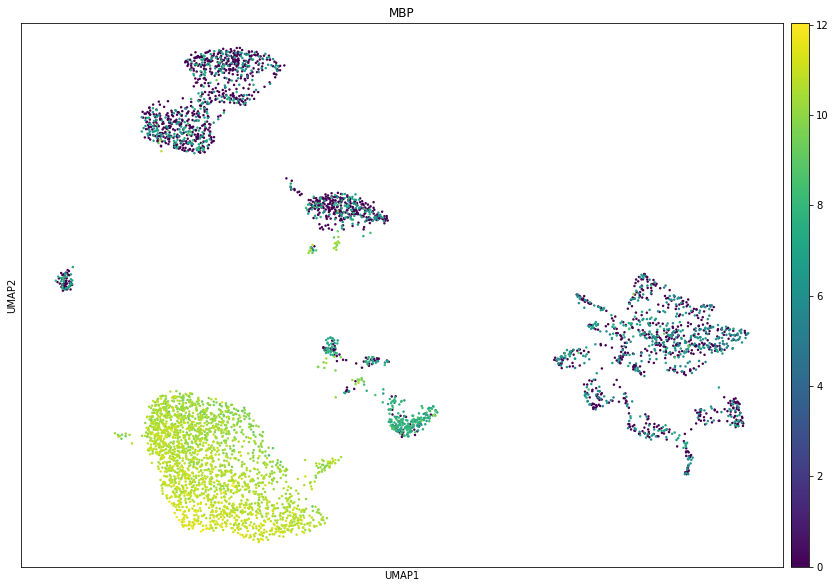

In [79]:
#Oligodendrocytes
sc.pl.umap(P2_ann,color="MBP",save="_p2_preclustering_oligodendrocytes.pdf")

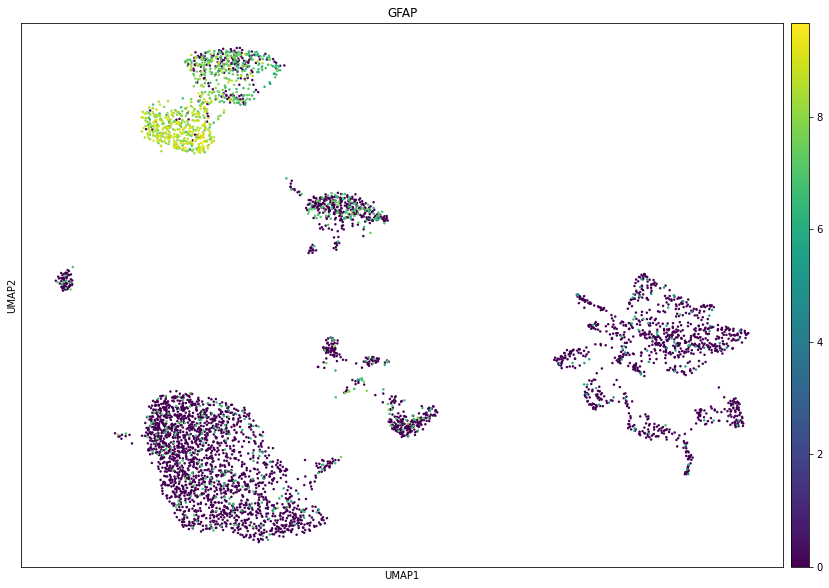

In [81]:
#Astrocytes
sc.pl.umap(P2_ann,color="GFAP",save="_p2_preclustering_astrocytes.pdf")

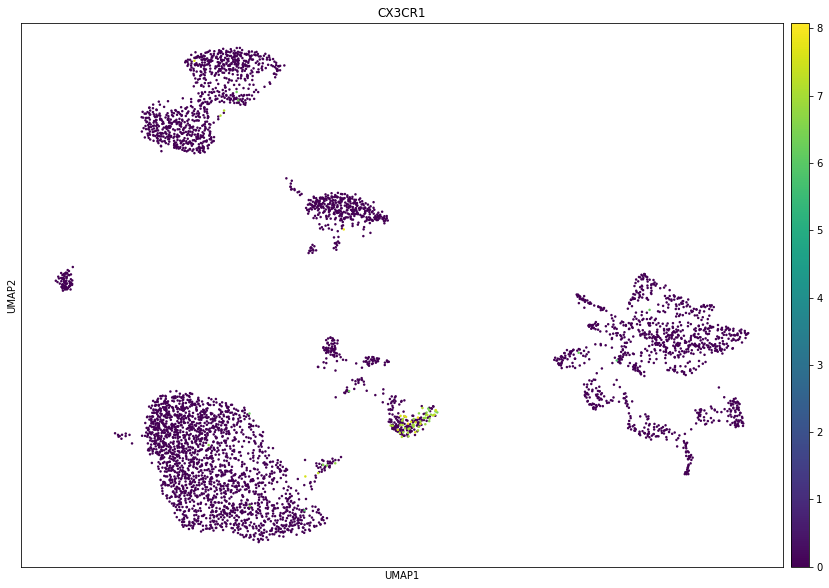

In [82]:
#Microglia
sc.pl.umap(P2_ann,color="CX3CR1",save="_p2_preclustering_microglia.pdf")

In [62]:
P3_mat = mmread("../paper_inter_data/P3_empty_drops_filtered_counts.mtx")
P3_annot = pd.read_csv("../paper_inter_data/P3_empty_drops_filtered_annotation.csv",index_col=2)
genes_df = pd.read_csv("/projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/dorsal_horn/P3/Solo.out/genes.tsv",sep="\t", header=None)


In [63]:
P3_singlets = P3_annot["hybrid_score"].values < 1.0
P3_singlet_exp = P3_mat.tocsc().transpose()[P3_singlets,:]
P3_annot_singlet = P3_annot.loc[P3_singlets,:]
P3_ann = AnnData(P3_singlet_exp,obs=annot_singlet)
P3_ann.var_names = gene_exp_vec

P3_ann.var_names_make_unique()


In [64]:
#crude preprocessing
#log normalize by CPM
sc.pp.normalize_per_cell(P3_ann, counts_per_cell_after=1e6)
sc.pp.log1p(P3_ann)
#calculate distance using top 50 pcas
sc.pp.neighbors(P3_ann)
#create the UMAP and initial preclustering
sc.tl.umap(P3_ann)


         Falling back to preprocessing with `sc.pp.pca` and default params.


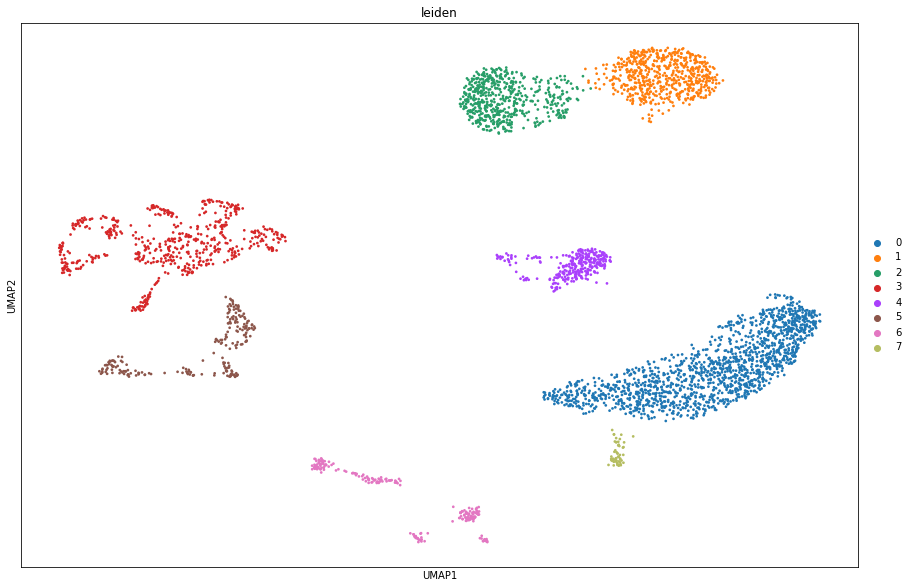

In [88]:
sc.tl.leiden(P3_ann, resolution=0.1)
sc.pl.umap(P3_ann,color="leiden")

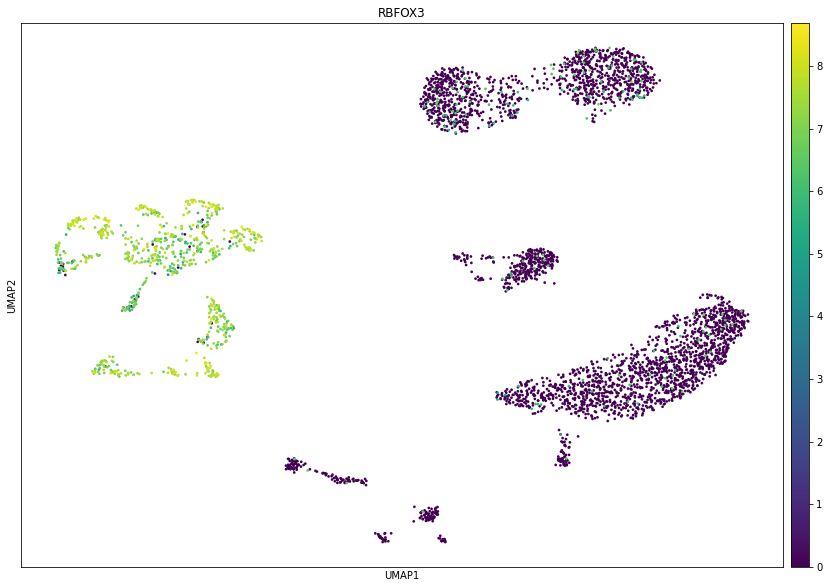

In [83]:
sc.pl.umap(P3_ann,color="RBFOX3",save="_p3_preclustering_neuron.pdf")

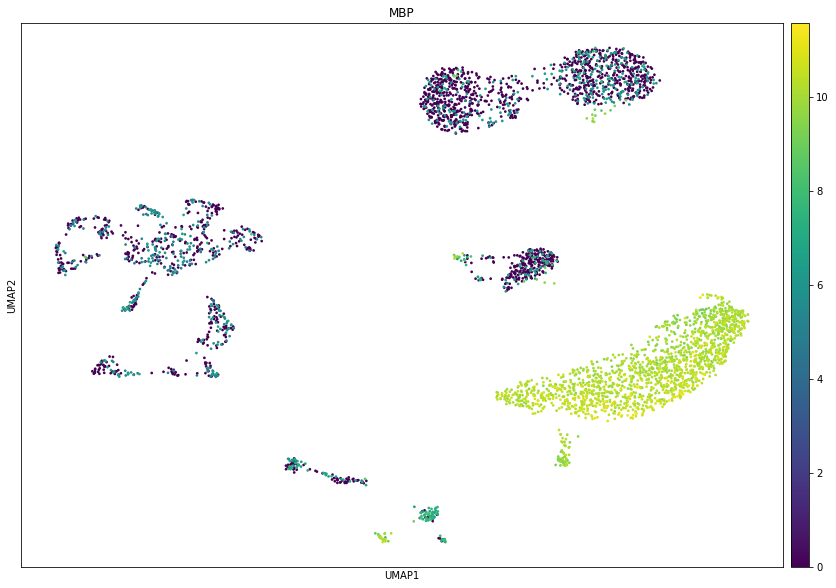

In [84]:
sc.pl.umap(P3_ann,color="MBP",save="_p3_preclustering_oligodendrocytes.pdf")

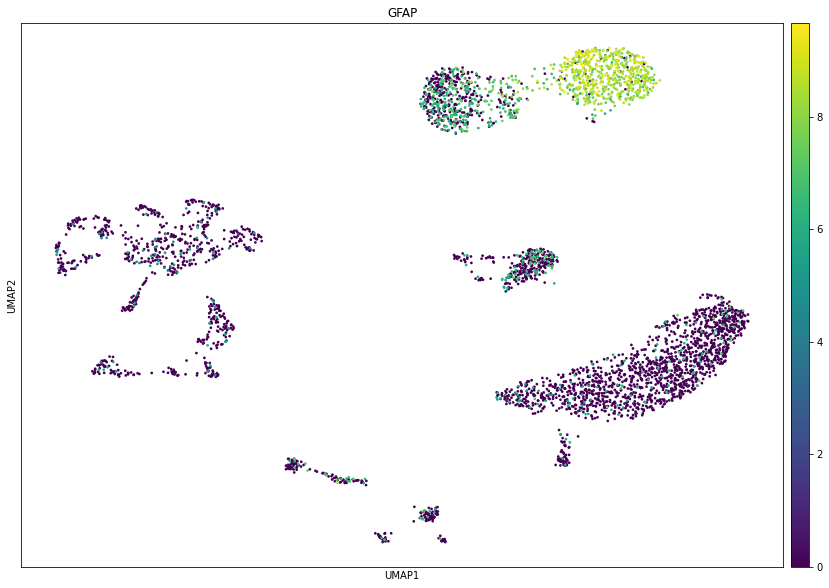

In [86]:
sc.pl.umap(P3_ann,color="GFAP", save="_p3_preclustering_astrocytes.pdf" )

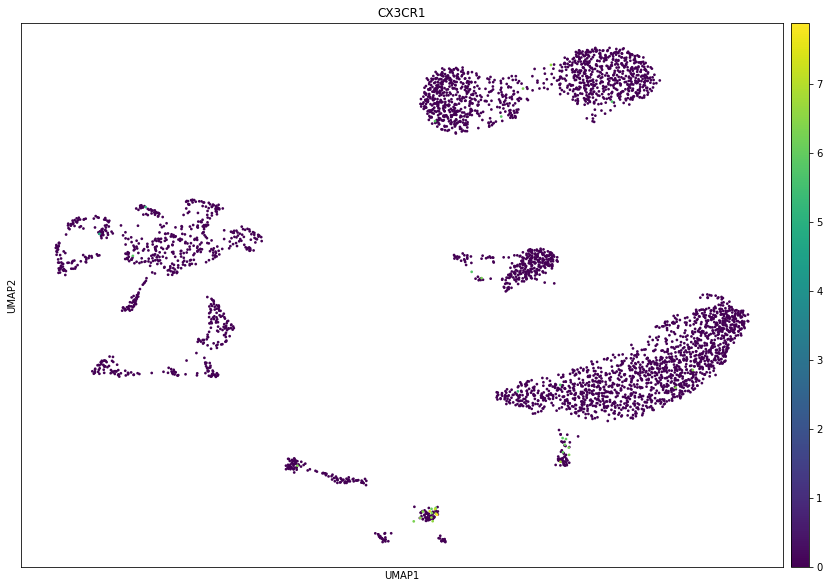

In [87]:
sc.pl.umap(P3_ann,color="CX3CR1", save="_p3_preclustering_microglia.pdf" )

In [90]:
p0_annot_singlet = p0_annot.loc[p0_singlets,:]

In [91]:
p0_annot_singlet["precluster"] = p0_ann.obs["leiden"].values

<ipython-input-91-6dfbcb2ea2ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p0_annot_singlet["precluster"] = p0_ann.obs["leiden"].values


In [109]:
p0_annot_singlet["nUMI"] = np.sum(p0_singlet_exp,axis=1)
p0_annot_singlet["nGene"] = np.sum(p0_singlet_exp>0,axis=1)

<ipython-input-109-2868b8d91d99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p0_annot_singlet["nUMI"] = np.sum(p0_singlet_exp,axis=1)
<ipython-input-109-2868b8d91d99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p0_annot_singlet["nGene"] = np.sum(p0_singlet_exp>0,axis=1)


In [110]:
p0_annot_singlet.to_csv("../paper_inter_data/P0_singlet_precluster_annot.csv")

In [104]:
mmwrite("../paper_inter_data/P0_singlet_counts.mtx",p0_singlet_exp)

In [111]:
P2_annot_singlet = P2_annot.loc[P2_singlets,:]
P2_annot_singlet["precluster"] = P2_ann.obs["leiden"].values
P2_annot_singlet["nUMI"] = np.sum(P2_singlet_exp,axis=1)
P2_annot_singlet["nGene"] = np.sum(P2_singlet_exp>0,axis=1)
P2_annot_singlet.to_csv("../paper_inter_data/P2_singlet_precluster_annot.csv")
mmwrite("../paper_inter_data/P2_singlet_counts.mtx",P2_singlet_exp)

<ipython-input-111-f927cd28373d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P2_annot_singlet["precluster"] = P2_ann.obs["leiden"].values
<ipython-input-111-f927cd28373d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P2_annot_singlet["nUMI"] = np.sum(P2_singlet_exp,axis=1)
<ipython-input-111-f927cd28373d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [112]:
P3_annot_singlet = P3_annot.loc[P3_singlets,:]
P3_annot_singlet["precluster"] = P3_ann.obs["leiden"].values
P3_annot_singlet["nUMI"] = np.sum(P3_singlet_exp,axis=1)
P3_annot_singlet["nGene"] = np.sum(P3_singlet_exp>0,axis=1)
P3_annot_singlet.to_csv("../paper_inter_data/P3_singlet_precluster_annot.csv")
mmwrite("../paper_inter_data/P3_singlet_counts.mtx",P3_singlet_exp)

<ipython-input-112-38ce3fa81e36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P3_annot_singlet["precluster"] = P3_ann.obs["leiden"].values
<ipython-input-112-38ce3fa81e36>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P3_annot_singlet["nUMI"] = np.sum(P3_singlet_exp,axis=1)
<ipython-input-112-38ce3fa81e36>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [118]:
print(P3_annot_singlet.shape)
print(P3_singlet_exp.shape)

(4093, 8)
(4093, 54894)
